In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Understanding / Cleaning the data

In [ ]:
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers

import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *

In [ ]:
%cd drive/MyDrive/collectbounty

/content/drive/MyDrive/collectbounty


In [ ]:
# download the data and make the price column into floats instead of strings
df = pd.read_csv('datasets/vhs_new_ebay.csv')
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# veiw the data
df.head()

,Title,Image,Info,Price
0,100's of VHS Tapes to choose from selection - ...,https://i.ebayimg.com/thumbs/images/g/NTsAAOSw...,New (Other),4.70
1,VHS 20/$30 HUGE LOT DISNEY CLAMSHELL MOVIES MA...,https://i.ebayimg.com/thumbs/images/g/k3IAAOSw...,Pre-Owned,30.00
2,Disney Alice in Wonderland VHS Video Tape Blac...,https://i.ebayimg.com/thumbs/images/g/dJwAAOSw...,New (Other),1.99
3,Beauty And The Beast - Walt Disney's RARE Blac...,https://i.ebayimg.com/thumbs/images/g/0pUAAOSw...,Brand New,39.95
4,VHS Cassette Tapes Only £1 each! Loads To Choo...,https://i.ebayimg.com/thumbs/images/g/xBsAAOSw...,Pre-Owned,1.27


In [ ]:
df.describe()

,Price
count,5282.000000
mean,17.562715
std,79.724580
min,0.010000
25%,4.990000
50%,8.950000
75%,17.990000
max,5452.290000


from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.Price.describe()

count    5282.000000
mean       17.562715
std        79.724580
min         0.010000
25%         4.990000
50%         8.950000
75%        17.990000
max      5452.290000
Name: Price, dtype: float64

- the max value of the price is to high
- the min price should not be zero

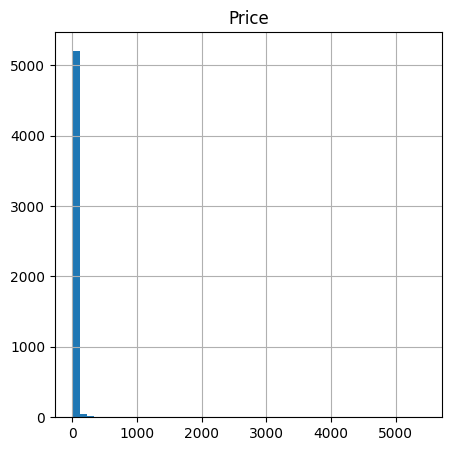

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(5,5))
plt.show()

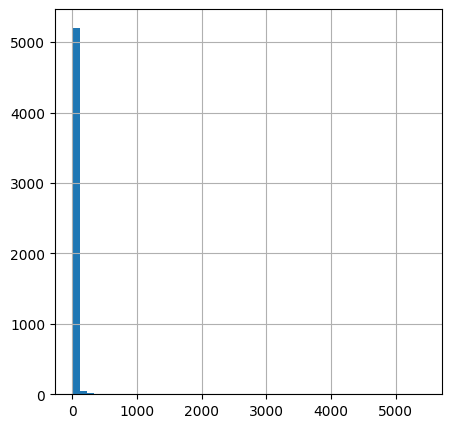

In [ ]:
# view a hist of the prices
import matplotlib.pyplot as plt
df.Price.hist(bins=50, figsize=(5, 5))
plt.show()

In [ ]:
df.Price.describe()

count    5282.000000
mean       17.562715
std        79.724580
min         0.010000
25%         4.990000
50%         8.950000
75%        17.990000
max      5452.290000
Name: Price, dtype: float64

In [ ]:
# remove all listings where the price is less then 500
df = df[df.Price < 25]

In [ ]:
df.Price.describe()

count    4378.000000
mean        8.745274
std         5.432218
min         0.010000
25%         4.990000
50%         6.990000
75%        11.490000
max        24.990000
Name: Price, dtype: float64

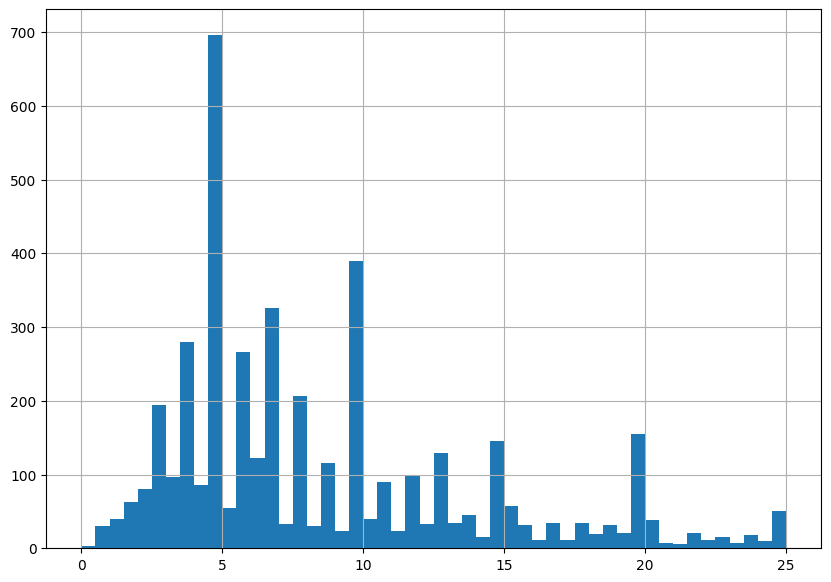

In [ ]:
import matplotlib.pyplot as plt
df.Price.hist(bins=50, figsize=(10,7))
plt.show()

In [ ]:
# how many listings have a price of zero
len(df.loc[df['Price'] == 0.01])

2

In [ ]:
# if the price is less then 10 revome the listing
df = df[df.Price > 1]

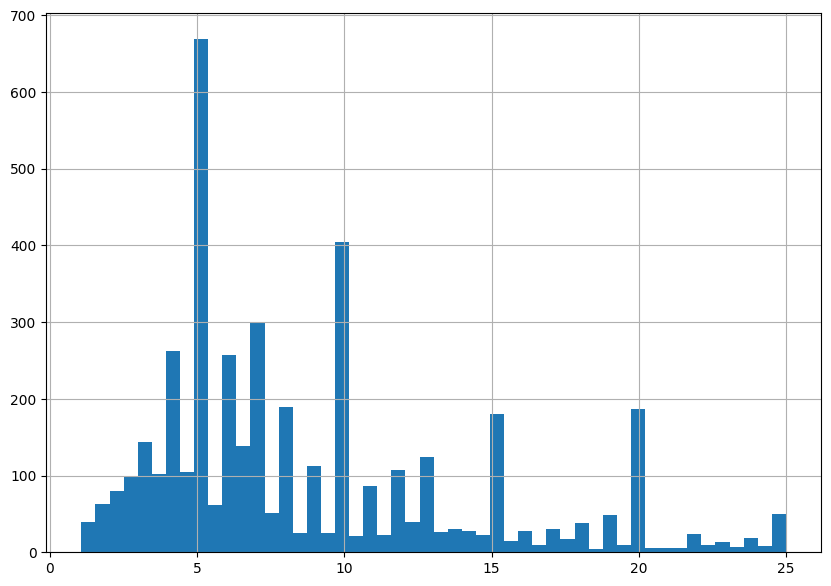

In [ ]:
import matplotlib.pyplot as plt
df.Price.hist(bins=50, figsize=(10,7))
plt.show()

- also removing listing that are not active

In [ ]:
df.Info.describe()

count          4333
unique            3
top       Pre-Owned
freq           3008
Name: Info, dtype: object

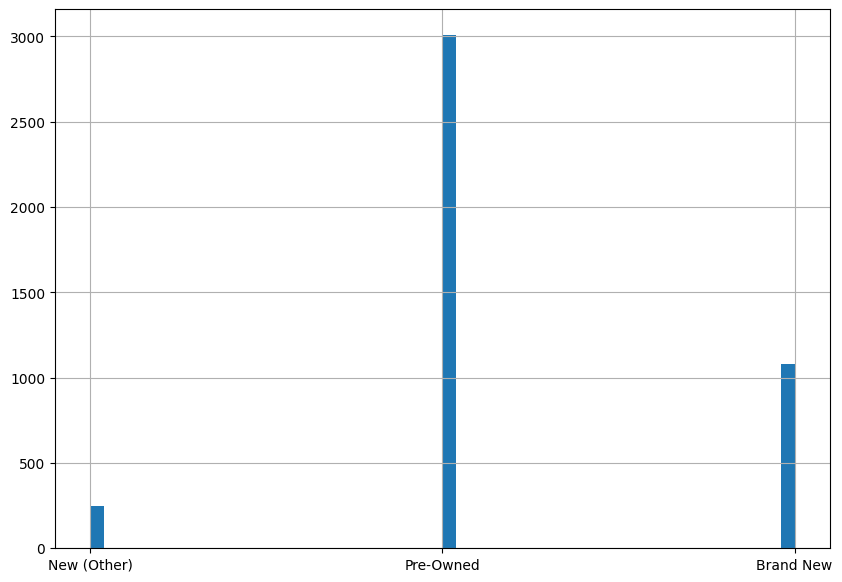

In [ ]:
import matplotlib.pyplot as plt
df.Info.hist(bins=50, figsize=(10,7))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4345 entries, 0 to 5281
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   4345 non-null   object 
 1   Image   4345 non-null   object 
 2   Info    4333 non-null   object 
 3   Price   4345 non-null   float64
dtypes: float64(1), object(3)
memory usage: 169.7+ KB


In [ ]:
# see how many pictures there are
len(df['Image'])

4345

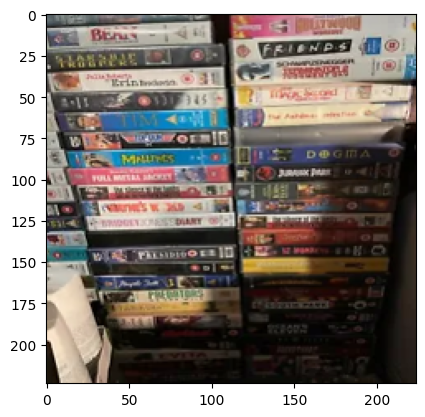

In [ ]:
# view one of the images
from PIL import Image
import requests
from io import BytesIO

IMAGE_SIZE = [224,224]

response = requests.get(df['Image'][4])
img = Image.open(BytesIO(response.content)).resize(IMAGE_SIZE)
plt.imshow(img)

In [ ]:
df.Price[4]

1.27

## preparing the data fro trainig

In [ ]:
# mix the data
df = df.sample(frac=1)

In [ ]:
# gets a list of the images as well as the prices
def get_img():
  img_list = []
  price_list = []
  data_dict=()
  for i in range(500):#len(Airbnb_data['price'])):
    try:
      if i % 100 == 0:
        # gets 6,000 images
        print(int((i/500)*100),'% done')#len(data['price']))*100)
      response = requests.get(df['Image'][i])
      img = Image.open(BytesIO(response.content)).resize([224,224])

      img = np.array(img) / 255.0 # makes imputs [0,1]
      img_list.append(img)
      price_list.append(df.Price[i])
    except (KeyError or OSError):
      pass
  return img_list, price_list

In [ ]:
X, y = get_img()


0 % done
20 % done
40 % done
60 % done
80 % done


In [ ]:
len(X)

369

In [ ]:
# split up the training set and test set
train_X = np.asarray(X[:300])
train_y = y[:300]
test_X = np.asarray(X[300:])
test_y = y[300:]

In [ ]:
len(test_X)

69

In [ ]:
!pip install Keras

### custom CNN

In [ ]:
print(type(train_X))
print(type(train_y))
print(type(test_X))
print(type(test_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_y = np.array(train_y)
test_y = np.array(test_y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, AveragePooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=3,strides=2, activation='relu',padding='SAME', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='VALID'))
model.add(Conv2D(64, kernel_size=3,strides=1, activation='relu',padding='SAME'))
model.add(AveragePooling2D(pool_size=(3,3),strides=1,padding='VALID'))
model.add(Conv2D(128, kernel_size=3,strides=2, activation='relu',padding='SAME'))
model.add(Dropout(.5))
model.add(Conv2D(64, kernel_size=3,strides=1, activation='relu',padding='SAME'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.25))
model.add(Dense(31,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [ ]:
# trains the model
history = model.fit(train_X, train_y, epochs=5,validation_split = 0.2,batch_size=50)

Epoch 1/5
5/5 [==============================] - 13s 2s/step - loss: 68.0642 - mse: 68.0642 - mae: 6.3776 - val_loss: 48.8810 - val_mse: 48.8810 - val_mae: 4.9264
Epoch 2/5
5/5 [==============================] - 8s 2s/step - loss: 39.3009 - mse: 39.3009 - mae: 4.7114 - val_loss: 50.9879 - val_mse: 50.9879 - val_mae: 5.0635
Epoch 3/5
5/5 [==============================] - 11s 2s/step - loss: 47.2770 - mse: 47.2770 - mae: 5.0731 - val_loss: 30.0317 - val_mse: 30.0317 - val_mae: 4.2294
Epoch 4/5
5/5 [==============================] - 15s 3s/step - loss: 42.7725 - mse: 42.7725 - mae: 4.9772 - val_loss: 47.6786 - val_mse: 47.6786 - val_mae: 4.8338
Epoch 5/5
5/5 [==============================] - 8s 2s/step - loss: 37.5668 - mse: 37.5668 - mae: 4.6814 - val_loss: 31.5058 - val_mse: 31.5058 - val_mae: 4.1880


In [ ]:
pred = model.predict(test_X)
print(np.sqrt(np.mean((pred - test_y)**2)))

3/3 [==============================] - 1s 234ms/step
5.743529793083703


### Checking the results

below is just an example of how the model did

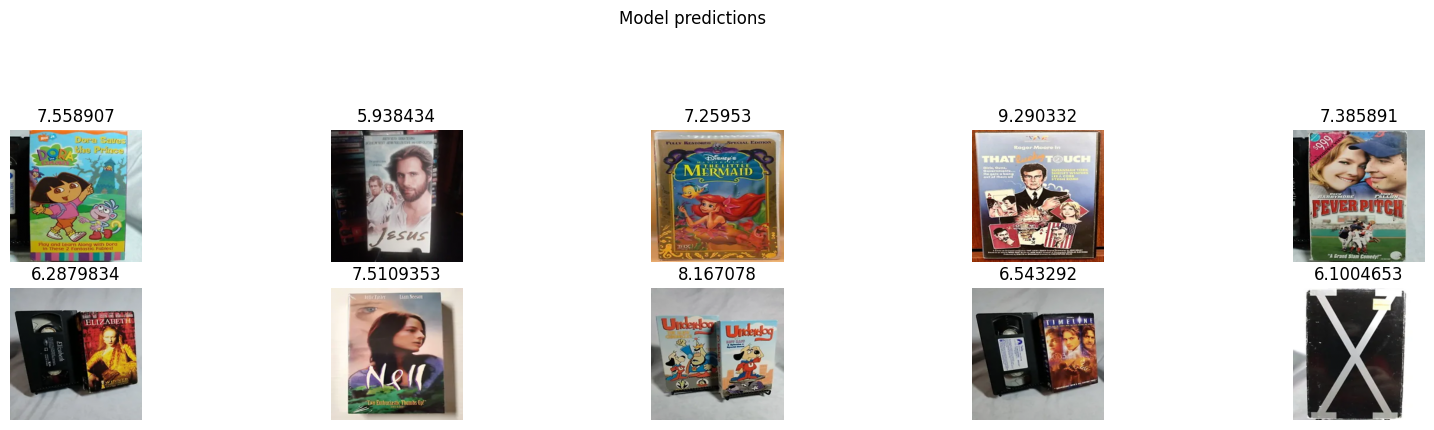

In [ ]:
plt.figure(figsize=(20,12))
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.imshow(test_X[n])
  plt.title(pred[n][0])
  plt.axis('off')
_ = plt.suptitle("Model predictions")

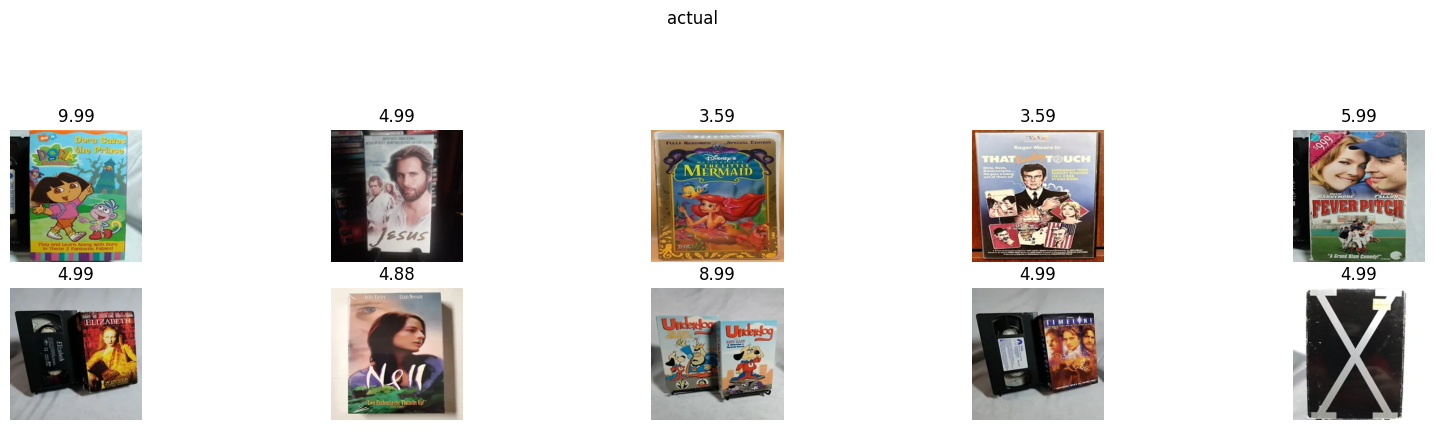

In [ ]:
plt.figure(figsize=(20,12))
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.imshow(test_X[n])
  plt.title(test_y[n])
  plt.axis('off')
_ = plt.suptitle("actual")